## Student Marks Predictor

In [1]:
import pandas as pd

In [2]:
student = pd.read_csv("data.csv")

In [3]:
student.head()

,age,PT,ST,tut,heal,conc,marks
0,16,3,2,22,53,100,71
1,16,3,9,45,87,34,70
2,19,3,1,56,32,25,47
3,16,2,7,98,12,59,72
4,17,1,6,4,79,50,60


In [4]:
%matplotlib inline

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1001 non-null   int64
 1   PT      1001 non-null   int64
 2   ST      1001 non-null   int64
 3   tut     1001 non-null   int64
 4   heal    1001 non-null   int64
 5   conc    1001 non-null   int64
 6   marks   1001 non-null   int64
dtypes: int64(7)
memory usage: 54.9 KB


In [6]:
student.describe()

,age,PT,ST,tut,heal,conc,marks
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,19.062937,2.008991,5.482517,50.310689,50.014985,51.131868,65.424575
std,2.027569,0.825178,2.888589,29.519458,29.087743,28.705585,19.383874
min,16.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000
25%,17.000000,1.000000,3.000000,24.000000,26.000000,26.000000,52.000000
50%,19.000000,2.000000,5.000000,50.000000,49.000000,52.000000,66.000000
75%,21.000000,3.000000,8.000000,76.000000,75.000000,76.000000,80.000000
max,22.000000,3.000000,10.000000,100.000000,100.000000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'PT'}>,
        <AxesSubplot:title={'center':'ST'}>],
       [<AxesSubplot:title={'center':'tut'}>,
        <AxesSubplot:title={'center':'heal'}>,
        <AxesSubplot:title={'center':'conc'}>],
       [<AxesSubplot:title={'center':'marks'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

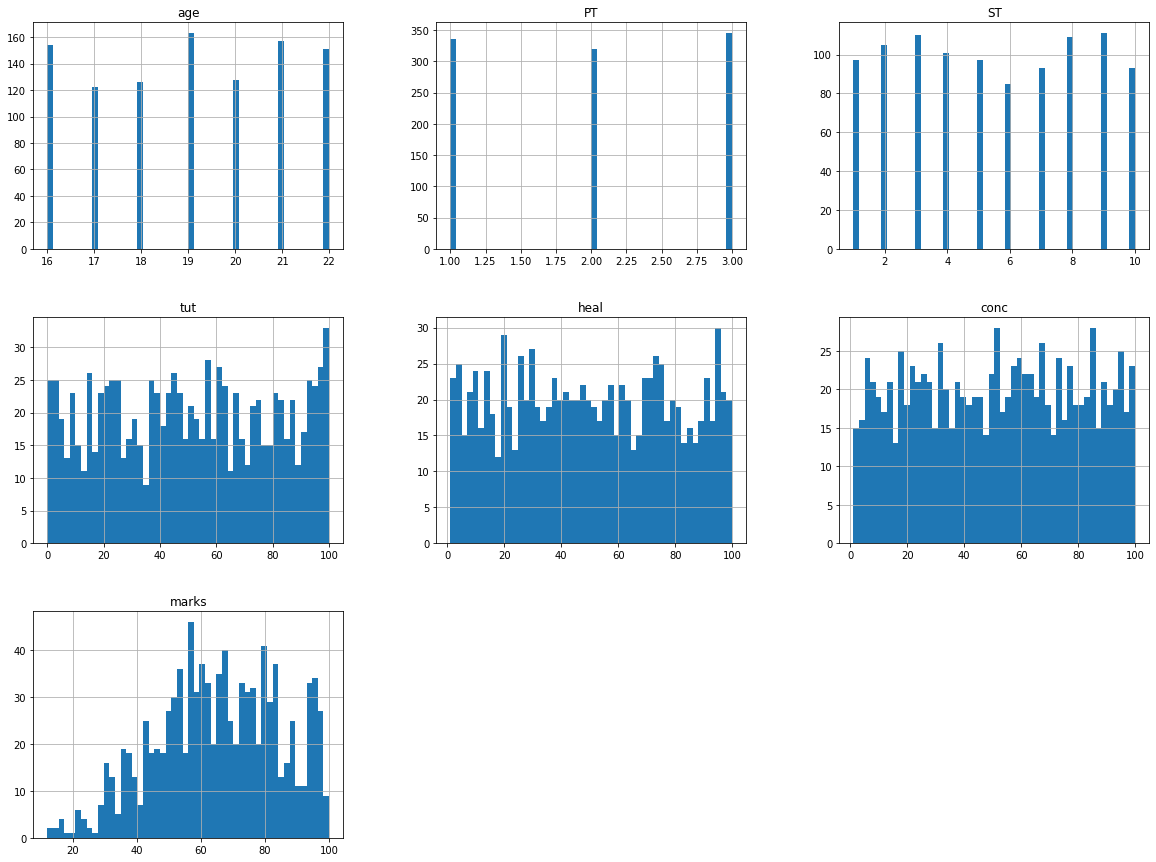

In [7]:
import matplotlib.pyplot as plt
student.hist(bins=50, figsize=(20,15))

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(student, student['age']):
    strat_train_set = student.loc[train_index]
    strat_test_set = student.loc[test_index]

In [10]:
strat_train_set['age'].value_counts()

19    130
21    125
16    123
22    121
20    102
18    101
17     98
Name: age, dtype: int64

In [11]:
strat_test_set['age'].value_counts()

19    33
21    32
16    31
22    30
20    26
18    25
17    24
Name: age, dtype: int64

In [12]:
housing = strat_train_set.copy()

In [13]:
# Taking out insights
corr_matrix = student.corr()


# Tells us that if we increase a given value, then how much MEDV will be increased
# Strong positive coorelation means that if you increase a certain value then the given value is increased
# Strong negative coorelation means that if you increase a certain value then the given value is decreased

corr_matrix['marks'].sort_values(ascending=False)

marks    1.000000
tut      0.578737
heal     0.570704
conc     0.559649
ST       0.065329
age      0.048070
PT      -0.134217
Name: marks, dtype: float64

array([[<AxesSubplot:xlabel='marks', ylabel='marks'>,
        <AxesSubplot:xlabel='tut', ylabel='marks'>,
        <AxesSubplot:xlabel='heal', ylabel='marks'>,
        <AxesSubplot:xlabel='PT', ylabel='marks'>],
       [<AxesSubplot:xlabel='marks', ylabel='tut'>,
        <AxesSubplot:xlabel='tut', ylabel='tut'>,
        <AxesSubplot:xlabel='heal', ylabel='tut'>,
        <AxesSubplot:xlabel='PT', ylabel='tut'>],
       [<AxesSubplot:xlabel='marks', ylabel='heal'>,
        <AxesSubplot:xlabel='tut', ylabel='heal'>,
        <AxesSubplot:xlabel='heal', ylabel='heal'>,
        <AxesSubplot:xlabel='PT', ylabel='heal'>],
       [<AxesSubplot:xlabel='marks', ylabel='PT'>,
        <AxesSubplot:xlabel='tut', ylabel='PT'>,
        <AxesSubplot:xlabel='heal', ylabel='PT'>,
        <AxesSubplot:xlabel='PT', ylabel='PT'>]], dtype=object)

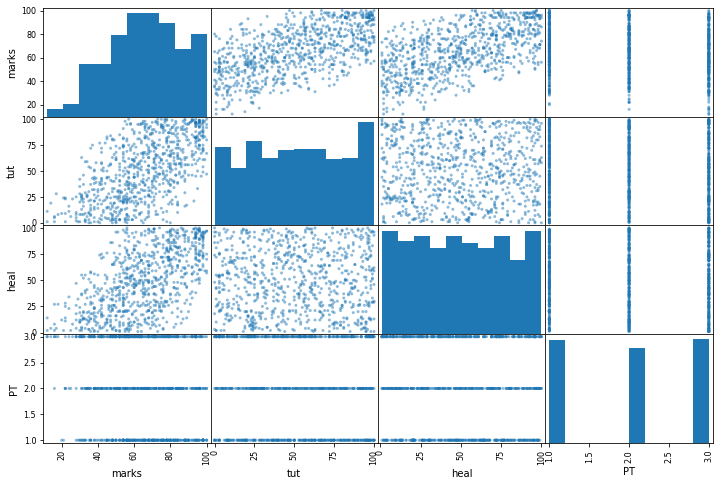

In [14]:
# Taking out insights by plotting
from pandas.plotting import scatter_matrix
attributes = ["marks", "tut", "heal", "PT"]
scatter_matrix(housing[attributes], figsize= (12, 8))

In [15]:
student = strat_train_set.drop("marks", axis=1)

In [16]:
student_labels = strat_train_set["marks"].copy() # get train_sets marks

In [17]:
# Note a machine learning algorithm works perfectly when data is at the same scale 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .....add as many as you want in your pipline.
    ('std_scaler', StandardScaler()),
])


In [18]:
student_num_tr = my_pipeline.fit_transform(student)

In [19]:
student_num_tr.shape

(800, 6)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
model =  LinearRegression()
model.fit(student_num_tr, student_labels)

LinearRegression()

In [21]:
some_data = student.iloc[:5]
# some_data = test_set.drop("marks", axis = 1)

In [22]:
some_labels = student_labels.iloc[0:5]

In [23]:
prepared_data = my_pipeline.transform(some_data)

In [24]:
model.predict(prepared_data)

array([ 65.51277049,  54.03320197,  78.96053453, 119.78096552,
        34.46858732])

In [25]:
list(some_labels)

[66, 54, 80, 98, 33]

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np
student_predictions = model.predict(student_num_tr)
mse = mean_squared_error(student_labels, student_predictions) # mse = Mean Squared Error
rmse = np.sqrt(mse)

In [27]:
rmse

2.522925978637198

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, student_num_tr, student_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [29]:
rmse_scores # Errors are less as compared to linear Regressor Out 43

array([3.84610145, 2.26804069, 1.53957906, 3.03861113, 2.75699856,
       2.1519924 , 1.84700329, 2.47461475, 2.96399275, 1.64138174])

In [30]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std()) # std = standard deviation

In [31]:
print_scores(rmse_scores)

Scores:  [3.84610145 2.26804069 1.53957906 3.03861113 2.75699856 2.1519924
 1.84700329 2.47461475 2.96399275 1.64138174]
Mean:  2.4528315829474896
Standard deviation:  0.6799100826101739


In [32]:
from joblib import dump, load
dump(model, "Student.joblib")

['Student.joblib']

In [33]:
X_test = strat_test_set.drop("marks", axis=1)
Y_test = strat_test_set["marks"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
j = 0
# perform conversion
for i in range(0, len(final_predictions)):
    final_predictions[i] = int(final_predictions[i])
      
    
print("Predictions: ", list(final_predictions))
print("Test data : ", list(Y_test))

Predictions:  [61.0, 82.0, 74.0, 93.0, 93.0, 75.0, 90.0, 85.0, 15.0, 54.0, 107.0, 56.0, 69.0, 80.0, 64.0, 55.0, 48.0, 61.0, 95.0, 77.0, 55.0, 79.0, 55.0, 31.0, 61.0, 82.0, 62.0, 78.0, 58.0, 76.0, 62.0, 71.0, 87.0, 82.0, 73.0, 98.0, 58.0, 54.0, 82.0, 79.0, 75.0, 58.0, 63.0, 48.0, 22.0, 58.0, 39.0, 43.0, 68.0, 73.0, 53.0, 63.0, 53.0, 55.0, 83.0, 67.0, 52.0, 32.0, 79.0, 36.0, 42.0, 53.0, 53.0, 79.0, 54.0, 109.0, 54.0, 57.0, 50.0, 78.0, 43.0, 72.0, 64.0, 73.0, 91.0, 83.0, 81.0, 56.0, 77.0, 77.0, 60.0, 62.0, 78.0, 81.0, 120.0, 72.0, 58.0, 72.0, 51.0, 70.0, 43.0, 78.0, 69.0, 33.0, 56.0, 70.0, 50.0, 74.0, 40.0, 70.0, 65.0, 77.0, 45.0, 52.0, 30.0, 81.0, 62.0, 83.0, 56.0, 65.0, 44.0, 67.0, 59.0, 28.0, 37.0, 46.0, 92.0, 64.0, 42.0, 79.0, 51.0, 73.0, 75.0, 50.0, 59.0, 82.0, 58.0, 66.0, 71.0, 61.0, 56.0, 61.0, 43.0, 53.0, 63.0, 103.0, 72.0, 26.0, 73.0, 86.0, 53.0, 61.0, 39.0, 53.0, 60.0, 40.0, 65.0, 52.0, 44.0, 26.0, 80.0, 37.0, 72.0, 88.0, 66.0, 73.0, 65.0, 82.0, 75.0, 68.0, 61.0, 57.0, 58.0, 87.

In [34]:
final_rmse

2.5449199150386614

In [35]:
prepared_data[0] # Taking a data for usage

array([ 9.56315032e-01, -1.50893082e-03, -1.53990688e+00,  1.41234767e+00,
       -1.26198495e+00, -7.19800247e-02])